# Statistics and Trends
**Analysis of Global Electric Vehicle Adoption Trends**

In [ ]:
# load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset 
file_path = 'D:\\Data Science\\University of Hertfordshire\\Applied Data Sceince\\Assignment 1\\Global EV Data 2024.csv'
ev_data = pd.read_csv(file_path)

**Step 1: Data Cleaning and Overview**

In [ ]:
# Check for missing values and data types
missing_values = ev_data.isnull().sum()
data_types = ev_data.dtypes
print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)

Missing Values:
 region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

Data Types:
 region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object


**Step 2: Descriptive Statistics**

In [ ]:
# Generate summary statistics for numeric columns
descriptive_stats = ev_data.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
                year         value
count  12654.000000  1.265400e+04
mean    2019.822112  4.273742e+05
std        5.476494  6.860498e+06
min     2010.000000  1.200000e-06
25%     2016.000000  2.000000e+00
50%     2020.000000  1.300000e+02
75%     2022.000000  5.500000e+03
max     2035.000000  4.400000e+08


**Step 3: Visualizations**

In [ ]:
# Set whitegrid theme for all plots
sns.set_theme(style="whitegrid")

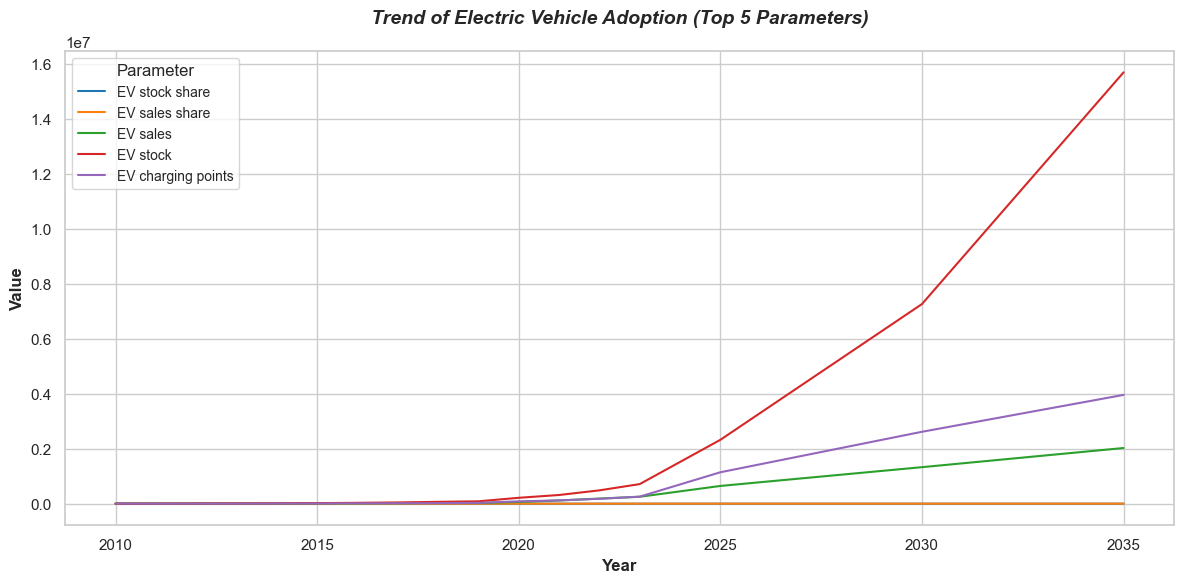

In [49]:
# Line Chart for EV Adoption Over the Years (Top 5 Parameters)
def plot_ev_adoption_trend_updated(data):
    # Filter data for relevant parameters for plotting (top 5 most frequent parameters)
    top_parameters = data['parameter'].value_counts().nlargest(5).index
    filtered_data = data[data['parameter'].isin(top_parameters)]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered_data, x='year', y='value', hue='parameter', errorbar=None, palette='tab10')
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontweight='bold')
    plt.title('Trend of Electric Vehicle Adoption (Top 5 Parameters)', fontsize=14, fontstyle='italic', fontweight='bold' , pad=20)
    plt.legend(title='Parameter', title_fontsize=12, fontsize=10, loc='upper left', frameon=True)
    plt.tight_layout()
    plt.show()

# Plotting the line chart
plot_ev_adoption_trend_updated(ev_data)

C:\Users\callm\AppData\Local\Temp\ipykernel_10284\2911913810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ev_stock_by_region, x='region', y='value', palette='viridis')


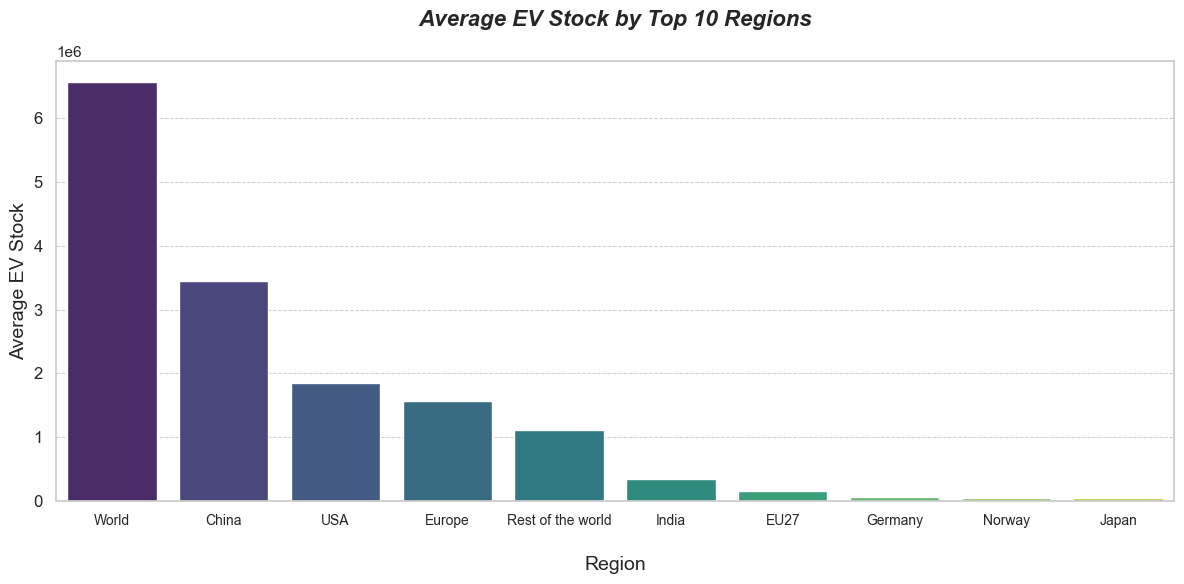

In [59]:
# Bar Chart for Average EV Stock by Region (Top 10 Regions)
def plot_ev_adoption_by_region_updated(data):
    # Calculate the average value of EV stock by region
    avg_ev_stock_by_region = data[data['parameter'] == 'EV stock'].groupby('region')['value'].mean().nlargest(10).reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_ev_stock_by_region, x='region', y='value', palette='viridis')
    plt.xlabel('Region',fontsize=14, labelpad=20)
    plt.ylabel('Average EV Stock', fontsize=14)
    plt.title('Average EV Stock by Top 10 Regions', fontstyle='italic', fontsize=16, fontweight='bold', pad=25)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()
    
# Plotting the updated bar chart
plot_ev_adoption_by_region_updated(ev_data)

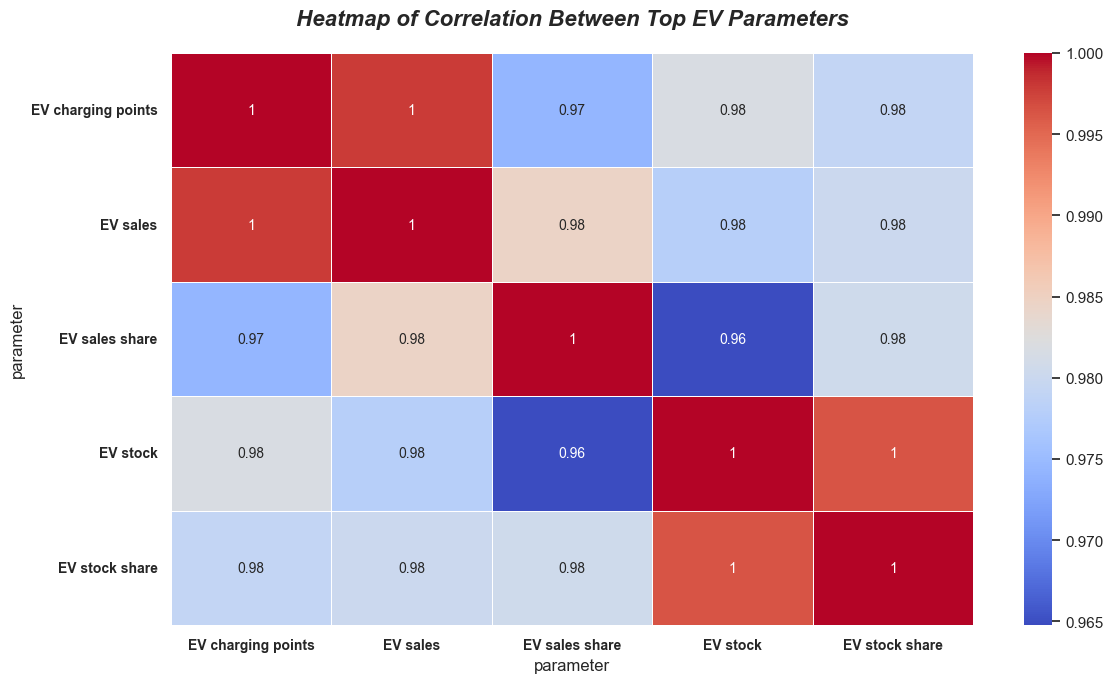

In [55]:
# Heatmap for Correlation Analysis (Filtered Top Parameters)
def plot_ev_correlation_heatmap_updated(data):
    # Filter data for numeric analysis (using 'value' column for top parameters)
    top_parameters = data['parameter'].value_counts().nlargest(5).index
    correlation_data = data[data['parameter'].isin(top_parameters)].pivot_table(values='value', index='year', columns='parameter', aggfunc='mean').dropna()

    plt.figure(figsize=(12, 7))
    sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
    plt.title('Heatmap of Correlation Between Top EV Parameters', fontsize=16, fontstyle='italic', fontweight='bold', pad=20)
    plt.xticks(fontsize=10, fontweight='bold')
    plt.yticks(fontsize=10, fontweight='bold', rotation=0)
    plt.tight_layout()
    plt.show()

# Plotting the updated heatmap
plot_ev_correlation_heatmap_updated(ev_data)

**Step 4: Statistical Analysis**

In [ ]:
# Correlation Matrix
correlation_matrix = ev_data.pivot_table(values='value', index='year', columns='parameter', aggfunc='mean').corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
 parameter                      EV charging points  EV sales  EV sales share  \
parameter                                                                     
EV charging points                       1.000000  0.997882        0.974305   
EV sales                                 0.997882  1.000000        0.984449   
EV sales share                           0.974305  0.984449        1.000000   
EV stock                                 0.981818  0.977968        0.964768   
EV stock share                           0.979107  0.980148        0.980472   
Electricity demand                       0.975609  0.971782        0.963203   
Oil displacement Mbd                     0.983580  0.981620        0.973374   
Oil displacement, million lge            0.983810  0.981920        0.973757   

parameter                      EV stock  EV stock share  Electricity demand  \
parameter                                                                     
EV charging points           

In [11]:
# Kurtosis and Skewness
top_parameters = ev_data['parameter'].value_counts().nlargest(5).index
filtered_data = ev_data[ev_data['parameter'].isin(top_parameters)]
kurtosis_values = filtered_data.groupby('parameter')['value'].apply(pd.Series.kurtosis)
skewness_values = filtered_data.groupby('parameter')['value'].apply(pd.Series.skew)

print("\nKurtosis Values:\n", kurtosis_values)
print("\nSkewness Values:\n", skewness_values)


Kurtosis Values:
 parameter
EV charging points     65.405339
EV sales              492.800526
EV sales share          9.209509
EV stock              670.494507
EV stock share         28.001827
Name: value, dtype: float64

Skewness Values:
 parameter
EV charging points     7.447326
EV sales              19.550292
EV sales share         3.006947
EV stock              23.274911
EV stock share         4.887911
Name: value, dtype: float64
